# Enunciado del ejercicio
Una agencia de representación de jugadores de la NBA busca captar nuevos jugadores promesas para patrocinarlos. Para ello y de la mano de análisis estadístico se proponen a generar un modelo que les sirva para predecir si un jugador de NBA tendrá una carrera larga (+5 Años) o no en base a las estadísticas de sus primeros años. 

- Visualización, limpieza y comprensión del dataset (3p): Se pide revisar la calidad de los datos, visualizaciones y que estadísticos ayudan a comprender mejor el dataset.
- Estudio de Correlación, PCA e Información Mutua (3p): Se pide hacer un análisis conjunto. En el caso de información mutua, se pide hacer uso de los distintos algoritmos mostrados en clase.
- Selección y justificación de varuables sobre el modelo (1p): Justificar en base a los dos puntos anteriores qué variables son preseleccionadas para construir el modelo
- Construcción de un Modelo de Regresión Logística (2p): Se pide generar diversos modelos basados en las variables seleccionadas, la comparación de los mismos y el estudio de residuales.
- Discusión de resultados y vías abiertas (1p): En base a los resultados obtenidos en los puntos anteriores,  ¿Recomendarías el uso de este modelo para la toma de decisiones de la agencia de representación?, ¿Por qué?, ¿Qué propuesta le harías a la agencia para mejorar la validez del modelo?


## Parámetros
- Name: Nombre
- GP: Games played
- MIN: Minutes played
- PTS: Points per game
- FGM: Field goals made (objetivos/logros de campo realizado)
- FGA: Field goal attempts (intentos de objetivos/logros de campo)
- 3P Made: 3 Point Made
- 3PA: 3 Point Attempts
- 3P%: 3 Point Attempts %
- FTM: Free throw made
- FTA: Free throw attempts
- FT%: Free throw percent
- OREB: Offensive rebounds
- DREB: Defensive rebounds
- REB: Rebounds
- AST Assists
- STL: Steals
- BLK: Blocks
- TOV: Turnovers
- Target_5Yrs: Outcome 1 if carrer lenght >=5 / 0 if carrer legnt <5


In [79]:
install.packages("FSelectorRcpp")
install.packages("dplyr")
install.packages("tidyr")

Warning message:
"package 'FSelectorRcpp' is in use and will not be installed"

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marc_\AppData\Local\Temp\Rtmpu4E52b\downloaded_packages
package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marc_\AppData\Local\Temp\Rtmpu4E52b\downloaded_packages


In [105]:
#cargamos el dataset
data<-read.csv(file="nba_logreg.csv", header=T, sep=",")
data=na.omit(data) #Eliminamos filas iguales repetidas
head(data)
tail(data)


Name,GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,...,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0


,Name,GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,...,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1337,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1338,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1339,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1340,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


In [106]:
#Observamos el total de datos y como estan distribuidas ñs muestras para el modelo
print("Número de posibles jugadores con carrera larga")
sum(data$TARGET_5Yrs)
print("Total de datos")
nrow(data)
print("Proporción de jugadores con carrera larga")
round(sum(data$TARGET_5Yrs)/nrow(data)*100)

[1] "Número de posibles jugadores con carrera larga"


[1] 826

[1] "Total de datos"


[1] 1329

[1] "Proporción de jugadores con carrera larga"


[1] 62

In [108]:
#Eliminamos momentaneamente la de los nombres para trabajar y en este caso no hace falta hacer la variable target.
dataraw<-data
dataraw$Name<-NULL
#dataraw$X3P.<-NULL
dataraw1<-dataraw
head(dataraw)
summary(dataraw)

GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,FTM,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0


       GP            MIN             PTS             FGM        
 Min.   :11.0   Min.   : 3.10   Min.   : 0.70   Min.   : 0.300  
 1st Qu.:47.0   1st Qu.:10.80   1st Qu.: 3.70   1st Qu.: 1.400  
 Median :63.0   Median :16.10   Median : 5.60   Median : 2.100  
 Mean   :60.4   Mean   :17.65   Mean   : 6.82   Mean   : 2.635  
 3rd Qu.:77.0   3rd Qu.:22.90   3rd Qu.: 8.80   3rd Qu.: 3.400  
 Max.   :82.0   Max.   :40.90   Max.   :28.20   Max.   :10.200  
      FGA              FG.           X3P.Made           X3PA       
 Min.   : 0.800   Min.   :23.80   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 3.300   1st Qu.:40.20   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 4.800   Median :43.90   Median :0.1000   Median :0.3000  
 Mean   : 5.902   Mean   :44.12   Mean   :0.2497   Mean   :0.7856  
 3rd Qu.: 7.500   3rd Qu.:47.80   3rd Qu.:0.4000   3rd Qu.:1.2000  
 Max.   :19.800   Max.   :73.70   Max.   :2.3000   Max.   :6.5000  
      X3P.             FTM             FTA              FT.        
 

,GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,FTM,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.00000000,0.5905958,0.5390694,0.5430001,0.5173947,0.29698671,0.10819470,0.09962586,0.038209111,0.48318459,0.48013550,0.19774264,0.40018361,0.46746691,0.46039020,0.37431119,0.45272570,0.27669982,0.5186933,0.397782876
MIN,0.59059581,1.0000000,0.9117464,0.9028637,0.9101942,0.20834058,0.38947367,0.40281351,0.165996551,0.79108881,0.77981253,0.23616004,0.57365519,0.74706548,0.71085316,0.62914705,0.75705017,0.40101051,0.8264309,0.316030669
PTS,0.53906940,0.9117464,1.0000000,0.9908739,0.9796763,0.26158711,0.34528932,0.35519760,0.151071831,0.89624544,0.88082551,0.25440359,0.57642075,0.69656013,0.67900156,0.55156085,0.67493681,0.39049580,0.8502722,0.314632051
FGM,0.54300009,0.9028637,0.9908739,1.0000000,0.9801170,0.29711280,0.28795599,0.29789752,0.119493281,0.84814638,0.84066677,0.21942305,0.59746760,0.70519142,0.69267804,0.53226104,0.66245659,0.40074381,0.8343431,0.316393268
FGA,0.51739472,0.9101942,0.9796763,0.9801170,1.0000000,0.13581506,0.38886001,0.41205286,0.197159626,0.82624393,0.80550663,0.26440538,0.50554748,0.64275151,0.61649722,0.58903763,0.68977092,0.32550302,0.8459524,0.290683738
FG.,0.29698671,0.2083406,0.2615871,0.2971128,0.1358151,1.00000000,-0.29157287,-0.34767955,-0.330690063,0.25338059,0.30636017,-0.15099610,0.51234587,0.41110270,0.46612579,-0.10354608,0.06112959,0.39078641,0.1264286,0.235587226
X3P.Made,0.10819470,0.3894737,0.3452893,0.2879560,0.3888600,-0.29157287,1.00000000,0.98257922,0.589855397,0.15571714,0.09305949,0.31225550,-0.21820989,0.01868775,-0.07086521,0.37431435,0.30514630,-0.15595545,0.2570150,0.035024733
X3PA,0.09962586,0.4028135,0.3551976,0.2978975,0.4120529,-0.34767955,0.98257922,1.00000000,0.582336887,0.17046307,0.10578447,0.32090093,-0.23104973,0.01361096,-0.07911139,0.40806650,0.33675720,-0.16924519,0.2824965,0.016150828
X3P.,0.03820911,0.1659966,0.1510718,0.1194933,0.1971596,-0.33069006,0.58985540,0.58233689,1.000000000,0.03031976,-0.03233307,0.32637157,-0.28875949,-0.12294948,-0.19107053,0.26212027,0.19432897,-0.24227385,0.1082770,-0.003410701
FTM,0.48318459,0.7910888,0.8962454,0.8481464,0.8262439,0.25338059,0.15571714,0.17046307,0.030319755,1.00000000,0.98062583,0.25312507,0.58632502,0.65765199,0.65719442,0.47440342,0.59953428,0.41256464,0.8047619,0.295546174


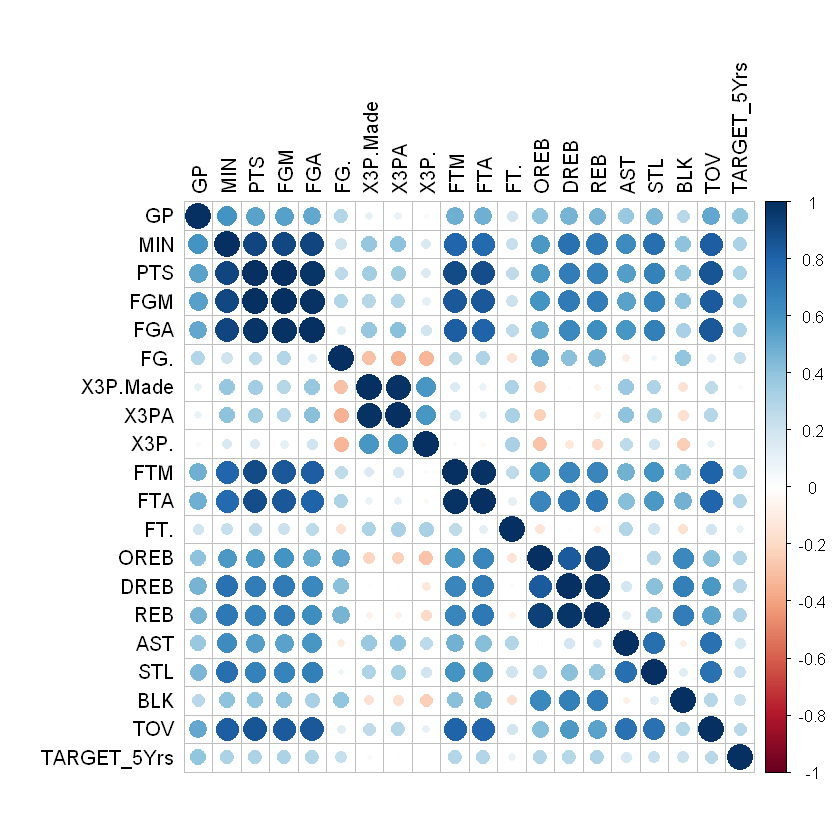

In [109]:
library(corrplot)
corrplot::corrplot(cor(dataraw), number.cex=.8, tl.col="black", tl.srt=90)
cor(dataraw)

# Visualización, limpieza y comprensión del dataset 

Podemos observar un dataset con muchos parámetros. Tenemos todo tipo de valores que nos indican si un jugador es bueno anotando y defendiendo. Con todos estos valores, si los comparamos es fácil determinar que jugador es mejor o peor. Pero en muchos casos esto no es así. A más a más, en este caso, por ejemplo, para poder trabajar sin problemas, me visto obligado a eliminar la columna de Nombre, ya que al no ser numérica entraba en conflicto en el momento de hacer estudios de estadísticos. En la columna de 3P% al haber valores nulos, sin ningún valor introducido entraba en conflicto también y aquí hay dos opciones, eliminar toda la columna o eliminar los valores nulos, que es la acción tomada en este caso. (Jugadores con valores nulos Jeff Wilkins, Jim Smith, Kurt Nimphius, Pete Verhoeven, Sam Williams, Tom Scheffler, Jim Peterson, Melvin Turpin, Ken Johnson "que esta repetido", Pete Williams). También se observan algunos nombres repetidos que son exactamente iguales (Ken Johnson, Bobby Jones, Mark Davis, Walker Russell y más) pero, no deberían influir en el modelo, ya que son más valores para el dataset y es otro valor más que añade peso a si algún jugador o no tendrá una carrera larga, es decir predecirá mejor para jugadores con esas características si tendrán o no una carrera larga.
Por otro lado, en nombres repetidos se observa que tienen el valor de Target_5Yrs diferente. Pero tienen los mismo estadísticos como en Bobby Jones o Walker Rusell. Esto a mi parecer introduce incertidumbre en el modelo ya que en algunos casos se pueden dar las dos posibilidades. Por otro lado, esto puede significar que en algunos casos estos jugadores serían escogidos dependiendo de factores externos que no tenemos aqui o no entendemos. Por lo tanto, podemos decidir si eliminarlos o trabajar con ellos. En este caso he decidido seguir trabajando con ellos, ya que puede ser que haya veces que jugadores con esas características si deberían ser escogidos y a veces no.
A simple vista observando el data set en excel y R no he podido ver una relación clara de que parámetros son los que más influyen en el momento de saber si un jugador tendrá o no una carrera larga. Por ejemplo, tenemos el caso de JaKarr Sampson y Malik Sealy, a mi parecer, Jakarr tiene mejores estadísticas en muchos casos y tiene más experiencia, ya que ha jugado más partidos en el primer año, pero según el dataset Malik Sealy es escogido para ser promocionado y tener una carrera larga en la NBA y JaKarr no. Tal vez hay cosas que se me escapan, ya que no soy un entendido del baloncesto, pero a simple vista es difícil decidir qué parámetros son los más importantes y más cuando hay jugadores repetidos que tienen diferentes valores de Target_5Yrs.
A mi parecer los parámetros que deberían tener más peso son los partidos jugados y los puntos por partido o eso me dice la lógica.


### PCA

In [149]:
dataraw1$TARGET_5Yrs<-NULL
head(dataraw1)

GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,FTM,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV
36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7


In [150]:
PCA<-princomp(dataraw1, scroes=T)
summary(PCA)

Warning message:
"In princomp.default(dataraw1, scroes = T) :
 extra argument 'scroes' will be disregarded"

Importance of components:
                           Comp.1     Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     19.2025050 16.5676994 9.3667470 7.7050772 5.26922285
Proportion of Variance  0.4457792  0.3318398 0.1060673 0.0717725 0.03356582
Cumulative Proportion   0.4457792  0.7776190 0.8836864 0.9554589 0.98902469
                            Comp.6      Comp.7      Comp.8       Comp.9
Standard deviation     2.011196397 1.639650627 0.975523515 0.7454020494
Proportion of Variance 0.004890047 0.003250175 0.001150481 0.0006717153
Cumulative Proportion  0.993914733 0.997164908 0.998315389 0.9989871042
                            Comp.10      Comp.11      Comp.12      Comp.13
Standard deviation     0.6807755037 0.3402940683 2.790508e-01 2.598324e-01
Proportion of Variance 0.0005602888 0.0001399951 9.413922e-05 8.161886e-05
Cumulative Proportion  0.9995473929 0.9996873880 9.997815e-01 9.998631e-01
                            Comp.14      Comp.15      Comp.16      Comp.17
Standar

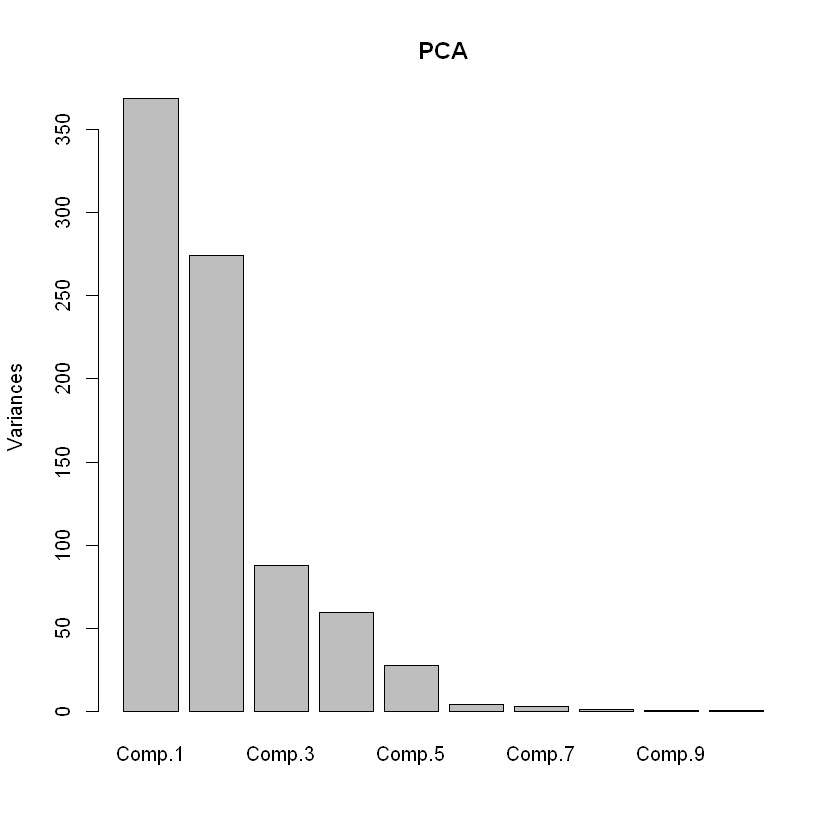

In [151]:
plot(PCA)

In [152]:
PCA$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
GP        0.854  0.304  0.150  0.388                                           
MIN       0.319               -0.705  0.163 -0.550 -0.128         0.109 -0.184 
PTS       0.157               -0.378         0.584                0.143  0.111 
FGM                           -0.146         0.229               -0.186        
FGA       0.127               -0.307         0.471         0.229 -0.400        
FG.              0.177        -0.144 -0.958        -0.129                      
X3P.Made                                                   0.165  0.103  0.267 
X3PA                                               -0.161  0.440  0.268  0.730 
X3P.      0.257 -0.901  0.315        -0.139                                    
FTM                                          0.136        -0.278  0.416        
FTA                           -0.104         0.179  0.112 -0.388  0.551        
FT.       0.211 -0.242 -0.933

### Information gain
- "infogain": ${H(Class)} + H(Attribute) − H(Class, Attribute)$

- "gainratio" : $H(Class) + H(Attribute) − H(Class, Attribute) / H(Attribute) $

- "symuncert" : $2 * (H(Class) + H(Attribute) − H(Class, Attribute)) / (H(Attribute) + H(Class)) $

where H(X) is Shannon’s Entropy for a variable X and H(X, Y) is a joint Shannon’s Entropy for a
variable X with a condition to Y.

In [153]:
library(FSelectorRcpp)
infogain = information_gain(formula = TARGET_5Yrs ~ .
                     , data = dataraw
                     , type = 'symuncert')
infogain

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."

attributes,importance
GP,0.08127448
MIN,0.06191365
PTS,0.07235832
FGM,0.07636994
FGA,0.05758289
FG.,0.05725257
X3P.Made,0.00000000
X3PA,0.00000000
X3P.,0.00000000
FTM,0.07505855


In [154]:
library(FSelectorRcpp)
infogain = information_gain(formula = TARGET_5Yrs ~ .
                     , data = dataraw
                     , type = 'gainratio')
infogain

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."

attributes,importance
GP,0.06073664
MIN,0.05185089
PTS,0.05808625
FGM,0.06132776
FGA,0.04630201
FG.,0.06430452
X3P.Made,NaN
X3PA,NaN
X3P.,NaN
FTM,0.07346344


In [155]:
library(FSelectorRcpp)
infogain = information_gain(formula = TARGET_5Yrs ~ .
                     , data = dataraw
                     , type = 'infogain')
infogain

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."

attributes,importance
GP,0.08145389
MIN,0.05095769
PTS,0.06363074
FGM,0.06712029
FGA,0.05049903
FG.,0.03422340
X3P.Made,0.00000000
X3PA,0.00000000
X3P.,0.00000000
FTM,0.05089250


# Estudio de Correlación, PCA e Información Mutua 

Fijándonos en las tablas de correlación hechas con corrplot podemos observar cómo los parámetros que más correlación tienen con el parámetro a estudiar "TARGET_5Yrs" son "GP","MIN","PTS" y "FGM". También creo que es importante tener en cuenta la correlación con datos más de estilo defensivo como los rebotes, en este caso la que más correlación tiene es "REB".

Si nos fijamos en el estudio de PCA podemos observar como de fuerte es la relación de cada componente con cada variable o parámetro. En el PCA hemos podido observar como la gran mayoría de la varianza se centra en los primeros 5 "Componentes" (Gráfica PCA). Y la relación de cada componente con cada parámetro.

La información mutua de dos variables aleatorias, denotado por I(X;Y), es una cantidad que mide la dependencia mutua de las dos variables; es decir, mide la reducción de la incertidumbre (entropía) de una variable aleatoria, X, debido al conocimiento del valor de otra variable aleatoria, Y. Es decir, dependiendo del algoritmo que utilicemos para medir la información mutua obtendremos valores diferentes. En este caso lo podemos observar cómo cada algoritmo utilizado obtiene diferentes valores. Como podemos observar en los 3 algoritmos los valores de importancia más elevados corresponden bastante bien a los que tiene más correlación con la variable a estudiar "TARGET_5Yrs". Lo que me a sorprendido bastante es que hay mucha diferencia entre algoritmos. Y que dan mucho peso a variables que según la tabla de correlación no serían tan importantes. Esto hace que tu abanico de decisión de variables en el momento de realizar el modelo cambie bastante. También una manera de elegir algoritmo y variables en mi caso me centrare en el algoritmo que más se parezca el nivel de importancia a la tabla de correlación realizada, ya que me parece de sentido común. En general, si observamos los tres algoritmos, siguen bastante bien la tabla de correlación lo que alguno se ajusta más. En mi caso escogeré variables fijándome sobre todo en el del algoritmo symuncert.


# Selección y justificación de varuables sobre el modelo

Centrandonos en los resultados obtenidos hasta ahora por correlación escogeré las variables por encima de 0.3
- GP
- MIN
- PTS
- FGM
- REB

Grácias al algoritmo de Información Mutua también escogeré
- FTM

Los resultados obtenidos en la Información mutua, me ayudan a corroborar los datos escogidos y a más a más complementar el modelo con más variables que si tienen importancia. También te corroboran la importancia de las variables escogidas por correlación. Lo que me sorprende es que los tres algoritmos den un valor de importancia tan bajo al parámetro REB, sabiendo que tiene una de las mayores correlaciones con TARGET_5Yrs. En el caso de FTM los tres algoritmos dan un valor de importancia muy elevado para FTM y a mi parecer el algoritmo que más se ajusta a la idea que yo tengo de la importancia de cada parámetro sería el symuncert.

# Construcción de un Modelo de Regresión Logística

In [156]:
modelo1<-glm(formula = TARGET_5Yrs ~ GP + MIN + PTS + FGM + FTM + REB , data=dataraw, family=binomial)
summary(modelo1)


Call:
glm(formula = TARGET_5Yrs ~ GP + MIN + PTS + FGM + FTM + REB, 
    family = binomial, data = dataraw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7808  -1.0055   0.5588   0.8705   1.9483  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.406503   0.233287 -10.316  < 2e-16 ***
GP           0.038672   0.004517   8.561  < 2e-16 ***
MIN         -0.040858   0.023184  -1.762  0.07801 .  
PTS          0.024622   0.219149   0.112  0.91054    
FGM          0.152627   0.456712   0.334  0.73824    
FTM          0.218749   0.240111   0.911  0.36228    
REB          0.189651   0.059191   3.204  0.00136 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1763.1  on 1328  degrees of freedom
Residual deviance: 1499.2  on 1322  degrees of freedom
AIC: 1513.2

Number of Fisher Scoring iterations: 4


In [157]:
modelo2<- glm(formula = TARGET_5Yrs ~ GP + REB , data=dataraw, family=binomial)
summary(modelo2)


Call:
glm(formula = TARGET_5Yrs ~ GP + REB, family = binomial, data = dataraw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5985  -1.0101   0.5735   0.8588   1.9809  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.557561   0.228397 -11.198  < 2e-16 ***
GP           0.040902   0.004075  10.038  < 2e-16 ***
REB          0.231356   0.041447   5.582 2.38e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1763.1  on 1328  degrees of freedom
Residual deviance: 1510.7  on 1326  degrees of freedom
AIC: 1516.7

Number of Fisher Scoring iterations: 4


In [165]:
modelo3<- glm(formula = TARGET_5Yrs ~ GP + REB + MIN , data=dataraw, family=binomial)
summary(modelo3)



Call:
glm(formula = TARGET_5Yrs ~ GP + REB + MIN, family = binomial, 
    data = dataraw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5858  -1.0097   0.5673   0.8622   1.9810  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.566651   0.228651 -11.225  < 2e-16 ***
GP           0.039612   0.004438   8.926  < 2e-16 ***
REB          0.209051   0.051459   4.062 4.86e-05 ***
MIN          0.008765   0.012113   0.724    0.469    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1763.1  on 1328  degrees of freedom
Residual deviance: 1510.1  on 1325  degrees of freedom
AIC: 1518.1

Number of Fisher Scoring iterations: 4


In [159]:
modelo1_prob<-predict(modelo1, type = 'response')
modelo1_prob<-ifelse(modelo1_prob>0.5,1,0)
print("Modelo 1")
head(modelo1_prob)
modelo2_prob<-predict(modelo2, type = 'response')
modelo2_prob<-ifelse(modelo2_prob>0.5,1,0)
print("Modelo 2")
head(modelo2_prob)
modelo3_prob<-predict(modelo3, type = 'response')
modelo3_prob<-ifelse(modelo3_prob>0.5,1,0)
print("Modelo 3")
head(modelo3_prob)

[1] "Modelo 1"


1 2 3 4 5 6 
0 0 1 1 1 1

[1] "Modelo 2"


1 2 3 4 5 6 
0 0 1 1 0 1

[1] "Modelo 3"


1 2 3 4 5 6 
0 0 1 1 0 1

In [160]:
install.packages("caret")
install.packages("e1071")
library(caret)

Warning message:
"package 'caret' is in use and will not be installed"

package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\marc_\anaconda3\Lib\R\library\00LOCK\e1071\libs\x64\e1071.dll  a C:\Users\marc_\anaconda3\Lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"Warning message:
"restored 'e1071'"


The downloaded binary packages are in
	C:\Users\marc_\AppData\Local\Temp\Rtmpu4E52b\downloaded_packages


In [161]:
c1 <- confusionMatrix(as.factor(modelo1_prob), as.factor(dataraw$TARGET_5Yrs))
c1

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 270 155
         1 233 671
                                          
               Accuracy : 0.7081          
                 95% CI : (0.6828, 0.7324)
    No Information Rate : 0.6215          
    P-Value [Acc > NIR] : 2.172e-11       
                                          
                  Kappa : 0.36            
                                          
 Mcnemar's Test P-Value : 9.265e-05       
                                          
            Sensitivity : 0.5368          
            Specificity : 0.8123          
         Pos Pred Value : 0.6353          
         Neg Pred Value : 0.7423          
             Prevalence : 0.3785          
         Detection Rate : 0.2032          
   Detection Prevalence : 0.3198          
      Balanced Accuracy : 0.6746          
                                          
       'Positive' Class : 0               
                              

In [162]:
c2<- confusionMatrix(as.factor(modelo2_prob), as.factor(dataraw$TARGET_5Yrs))
c2

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 258 151
         1 245 675
                                          
               Accuracy : 0.702           
                 95% CI : (0.6766, 0.7265)
    No Information Rate : 0.6215          
    P-Value [Acc > NIR] : 4.624e-10       
                                          
                  Kappa : 0.3426          
                                          
 Mcnemar's Test P-Value : 2.962e-06       
                                          
            Sensitivity : 0.5129          
            Specificity : 0.8172          
         Pos Pred Value : 0.6308          
         Neg Pred Value : 0.7337          
             Prevalence : 0.3785          
         Detection Rate : 0.1941          
   Detection Prevalence : 0.3078          
      Balanced Accuracy : 0.6651          
                                          
       'Positive' Class : 0               
                              

In [163]:
c3<- confusionMatrix(as.factor(modelo3_prob), as.factor(dataraw$TARGET_5Yrs))
c3


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 263 154
         1 240 672
                                         
               Accuracy : 0.7035         
                 95% CI : (0.6782, 0.728)
    No Information Rate : 0.6215         
    P-Value [Acc > NIR] : 2.199e-10      
                                         
                  Kappa : 0.3481         
                                         
 Mcnemar's Test P-Value : 1.850e-05      
                                         
            Sensitivity : 0.5229         
            Specificity : 0.8136         
         Pos Pred Value : 0.6307         
         Neg Pred Value : 0.7368         
             Prevalence : 0.3785         
         Detection Rate : 0.1979         
   Detection Prevalence : 0.3138         
      Balanced Accuracy : 0.6682         
                                         
       'Positive' Class : 0              
                                         

### Discusión

Podemos observar los 3 modelos realizados para prever si un jugador tendrá una carrera larga o no en la NBA. Observamos como los resultados obtenidos son muy parecidos, prácticamente iguales. Podemos decir que el modelo 1 es un poco más preciso, pero por demasiado poco. El problema cuando sacamos parámetros que no son significativos para hacer el modelo pierde un poco de precisión clasificando los jugadores que no tienen una larga carrera en la NBA, en cambio se gana algo de precisión en los jugadores que si tendrán una larga carrera en la NBA. 
Fijándonos en la "Residual Deviance" y la "Null Deviance" podemos decir que el modelo está bien realizado, ya que si tuviera valores pequeños respecto a los grados de libertad podríamos decir que el modelo por si solo explica los datos bastante bien. EL valor contra más cercano sea a los grados de libertad será mejor. 
EL valor del "Residual defiance" debería siempre ser más bajo que el "Null deviance" ya que es el resultado una vez hemos aplicado el modelo con los predictores. El "Residual defiance" muestra que tan bien predice el modelo la respuesta cuando se incluyen los predictores. De ahí que la diferencia entre La "Null defiance" y la "Residual defiance" respecto a los grados de libertad sea más cercana a 1 la "Residual defiance".
Por lo tanto, podemos asegurar que el modelo que mejor predice el TARGET_5Yrs es el modelo 1 con 6 predictores.


# Discusión de resultados y vías abiertas

Yo personalmente, no recomendaría el uso de este modelo para la toma de decisiones. Ya que estamos hablando de que pueden ser inversiones millonarias por cada jugador y, por lo tanto, el error está muy penalizado. Sale más rentable tener a una persona entendida y que se dedique a decidir con mejores criterios que jugador tendrá una larga carrera en la NBA para invertir promoción en él que un algoritmo con un 70% de precisión ya que sus fallos supondrán más perdidas que el dinero que deberías pagar a alguien que entienda. Para poder mejorar la validez de este modelo, creo que sería necesario tener más datos a nivel de opinión pública respecto al jugador (Por ejemplo, nº de seguidores en redes, ya que es una manera de determinar el impacto de ese jugador en EEUU) y sueldos que tienen los jugadores. Esto creo que determina un "status" y añade un valor para determinar si el jugador permanecerá o no en la mejor liga de baloncesto. 